In [192]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
data=pd.read_csv("/Users/sripradharavi/Documents/Computers.csv")

In [194]:
data.head()
data.shape

(6259, 11)

In [195]:
data=data.drop('index', 1)

In [196]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


[<matplotlib.text.Text at 0x11ef49a20>, <matplotlib.text.Text at 0x11ef3e1d0>]

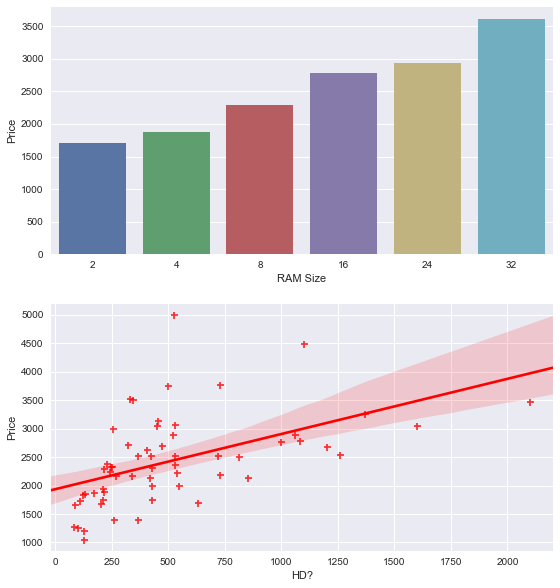

In [170]:
fig, (ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(9,10)
ramAgg=pd.DataFrame(data.groupby("ram")["price"].mean()).reset_index()
ramSorted=ramAgg.sort_values(by="price", ascending=False)
sn.barplot(data=ramSorted,x="ram",y="price", ax=ax1)
ax1.set(xlabel="RAM Size", ylabel="Price")

ramAgg=pd.DataFrame(data.groupby("hd")["price"].mean()).reset_index()
ramSorted=ramAgg.sort_values(by="price", ascending=False)
sn.regplot(data=ramSorted,x="hd",y="price", ax=ax2, color="r", marker="+")
ax2.set(xlabel="HD?", ylabel="Price")

/Users/sripradharavi/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


((array([-3.69316996, -3.46128945, -3.33365932, ...,  3.33365932,
          3.46128945,  3.69316996]),
  array([ 949,  999,  999, ..., 5399, 5399, 5399])),
 (571.83574719629473, 2219.576609682058, 0.98410055187607004))

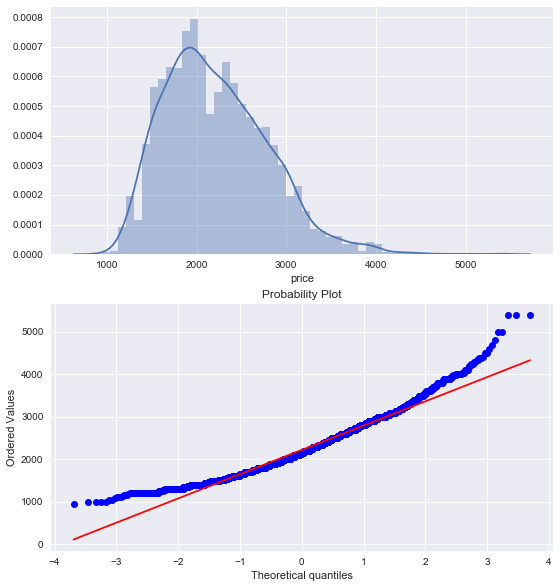

In [171]:
fig, (ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(9,10)
sn.distplot(data["price"],ax=ax1)
stats.probplot(data["price"], dist='norm', fit=True, plot=ax2)

/Users/sripradharavi/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


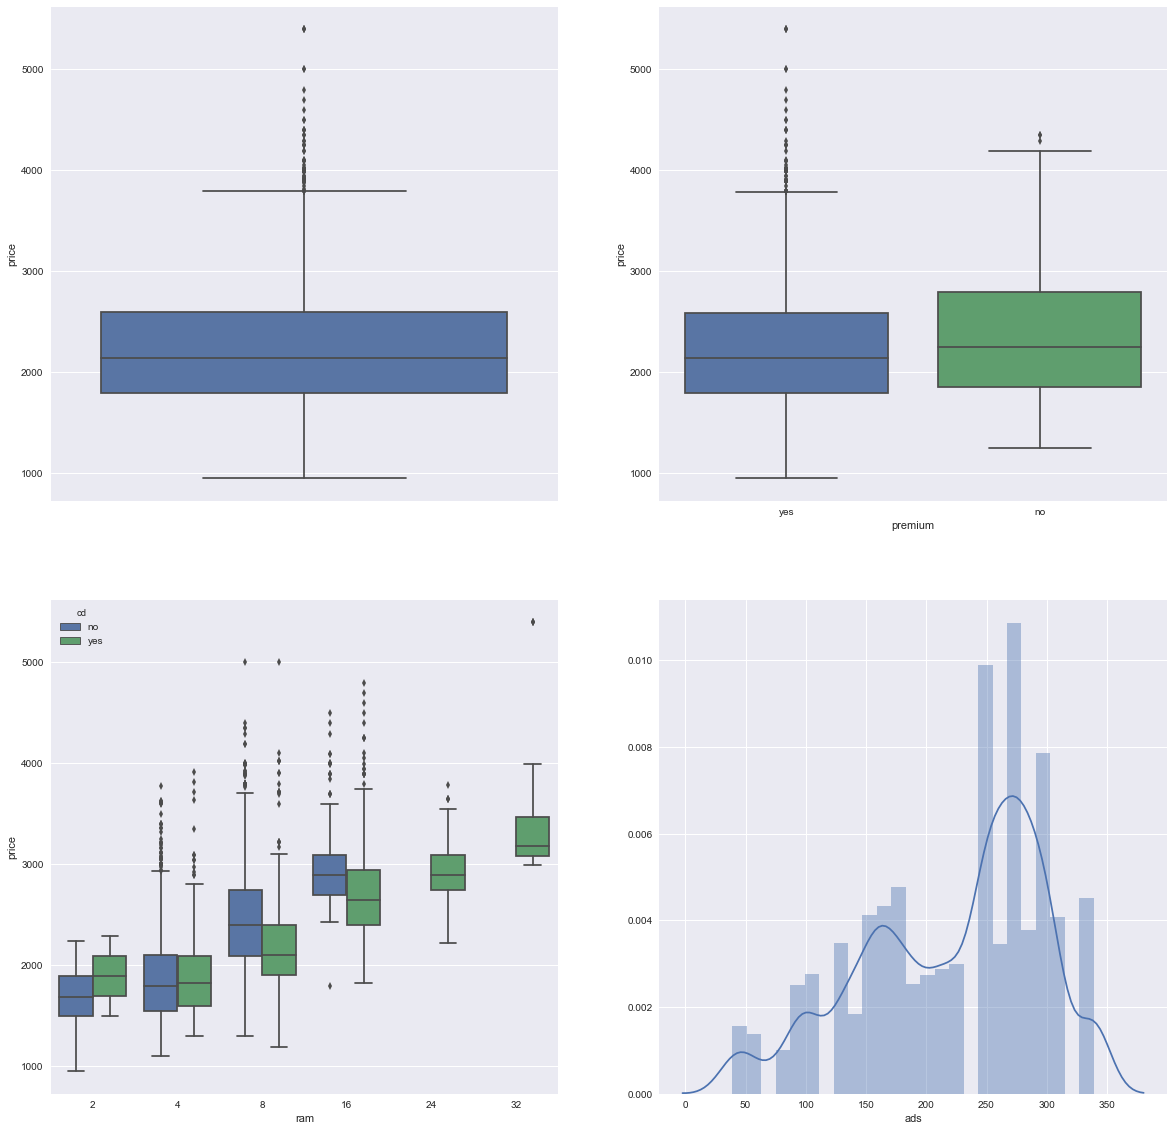

In [172]:
fig, axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,20)
sn.boxplot(data=data, y="price", orient="v", ax=axes[0][0])
sn.boxplot(data=data, y="price", x="premium", ax=axes[0][1])
sn.boxplot(data=data, y="price", x="ram",hue="cd", ax=axes[1][0])
sn.distplot(data["ads"], ax=axes[1][1])

In [173]:
data.shape

(6259, 10)

Visualising the realtionship between Price of Laptop and Features. 

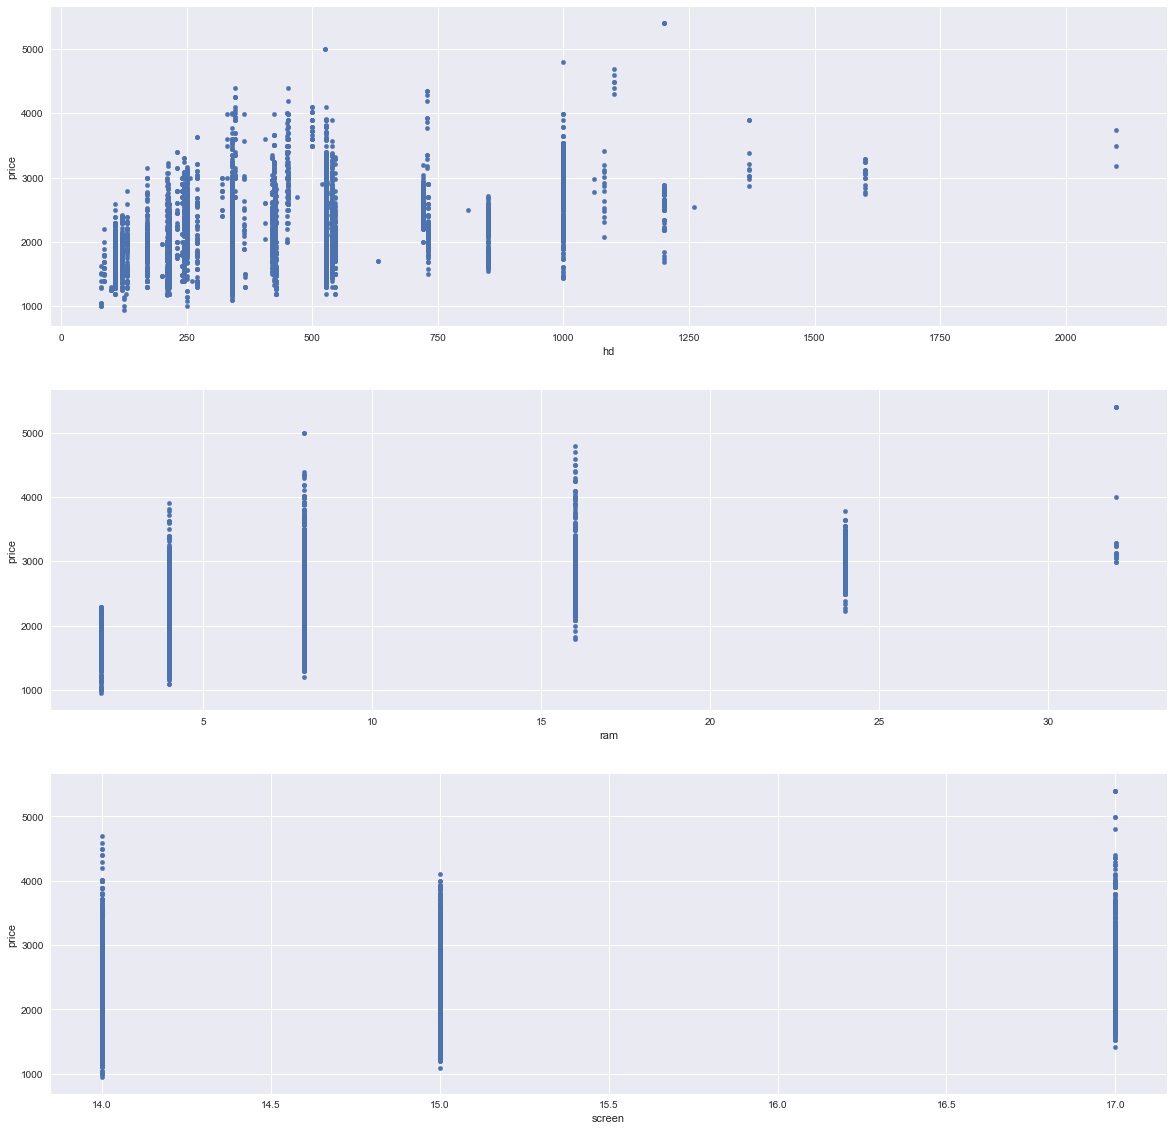

In [174]:
fig, axs=plt.subplots(nrows=3, sharey=True)
fig.set_size_inches(20,20)
data.plot(kind='scatter', x="hd", y="price", ax=axs[0])
data.plot(kind='scatter', x="ram", y="price", ax=axs[1])
data.plot(kind='scatter', x="screen", y="price", ax=axs[2])

Running Linear Regression Model on the Dataset:

In [175]:
import statsmodels.formula.api as smf
train=data[:4500]
test=data[4500:]
lm=smf.ols(formula='price ~ speed+hd+ram+screen+ads+trend', data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1734.
Date:                Mon, 13 Mar 2017   Prob (F-statistic):               0.00
Time:                        15:10:08   Log-Likelihood:                -32419.
No. Observations:                4500   AIC:                         6.485e+04
Df Residuals:                    4493   BIC:                         6.490e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -632.1665     84.200     -7.508      0.000      -797.240  -467.093
speed          9.8327      0.263     37.421      0.000         9.318    10.348
hd             1.0940      0.042     26.331      0.000         1.013     1.175
ram           42.2503      1.557     27.143      0.000        39.199    45.302
screen       151.0867      5.773     26.170      0.000       139.768   162.405
ads            0.4987      0.101      4.949      0.000         0.301     0.696
trend        -46.0249      1.322    -34.808      0.000       -48.617   -43.433
==============================================================================
Omnibus:                      773.730   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1551.915
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                       4.999   Cond. No.                     7.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
test=pd.DataFrame(test)
preds=lm.predict(test)
preds

array([ 1635.29951624,  1668.65727593,  3202.35783916, ...,  3352.81173372,
        2631.90282568,  2934.0762038 ])

ANOVA: 

In [177]:
import statsmodels.api as sm
lm=smf.ols(formula='price ~ speed+hd+ram+screen+ads+trend ', data=data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print (table)

                sum_sq      df            F         PR(>F)
speed     1.762052e+08     1.0  1813.893419   0.000000e+00
hd        5.108394e+07     1.0   525.868858  8.246589e-112
ram       1.546443e+08     1.0  1591.940993  2.460169e-310
screen    7.628163e+07     1.0   785.259162  7.101880e-163
ads       2.840074e+07     1.0   292.363156   4.278064e-64
trend     4.713896e+08     1.0  4852.583567   0.000000e+00
Residual  6.073317e+08  6252.0          NaN            NaN


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [179]:
from patsy import dmatrices
y, X=dmatrices('price~ram+C(multi)+C(cd)+C(premium)', train, return_type='dataframe')
logreg=LogisticRegression()
lr=logreg.fit(X,y)
lr

/Users/sripradharavi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
data.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


LOGISTIC REGRESSION: Whether a premium will be charged or not. 

In [197]:
#converting categorical variables to dummy variables
dummy_cd=pd.get_dummies(data['cd'], prefix='cd')
dummy_multi=pd.get_dummies(data['multi'], prefix='multi')
dummy_premium=pd.get_dummies(data['premium'], prefix='premium')

In [201]:
cols_to_keep=['price', 'speed', 'hd', 'ram', 'screen','ads', 'trend']
data=data[cols_to_keep].join(dummy_cd.ix[:,'cd_yes'])
cols_to_keep=['price', 'speed', 'hd', 'ram', 'screen','ads', 'trend','cd_yes']
data=data[cols_to_keep].join(dummy_multi.ix[:,'multi_yes'])
cols_to_keep=['price', 'speed', 'hd', 'ram', 'screen','ads', 'trend','cd_yes','multi_yes']
data=data[cols_to_keep].join(dummy_premium.ix[:,'premium_yes'])
data.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1


In [183]:
train_cols=data.columns[1:]
train_cols

Index(['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes', 'multi_yes'], dtype='object')

In [207]:
import statsmodels.api as sm
logit=sm.Logit(data['premium_yes'],data[train_cols])
result=logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.089561
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            premium_yes   No. Observations:                 6259
Model:                          Logit   Df Residuals:                     6251
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Mar 2017   Pseudo R-squ.:                 0.03526
Time:                        15:21:30   Log-Likelihood:                -560.57
converged:                       True   LL-Null:                       -581.05
                                        LLR p-value:                 8.180e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
speed          0.0102      0.003      3.963      0.000         0.005     0.015
hd             0.0021      0.001      4.036      0.000         0.001     0.003
ram            0.0970      0.023      4.135      0.000         0.051     0.143
screen         0.1738      0.019      9.314      0.000         0.137     0.210
ads           -0.0063      0.001     -8.498      0.000        -0.008    -0.005
trend         -0.0654      0.009     -7.599      0.000        -0.082    -0.049
cd_yes         0.8555      0.141      6.072      0.000         0.579     1.132
multi_yes      2.4862      0.466      5.334      0.000         1.573     3.400
==============================================================================
"""

In [211]:
result.conf_int()

,0,1
speed,0.005171,0.015292
hd,0.001081,0.003123
ram,0.051021,0.142970
screen,0.137227,0.210369
ads,-0.007776,-0.004861
trend,-0.082300,-0.048551
cd_yes,0.579352,1.131603
multi_yes,1.572619,3.399816
